In [1]:
import pandas as pd
import numpy as np

In [3]:
## Influência do ano em que concluiu o ensino médio na nota final
## Influência da faixa etária na nota final
## O quanto a faixa etária e o ano em que concluiu o ensino médio são responsáveis pela variância na nota final da prova

In [2]:
dfMicroDados = pd.read_csv("MICRODADOS_ENEM_2021.csv", sep=";", encoding='latin-1')
dfItens = pd.read_csv("ITENS_PROVA_2021.csv", sep=";", encoding='latin-1')

In [3]:
dfMicroDados.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

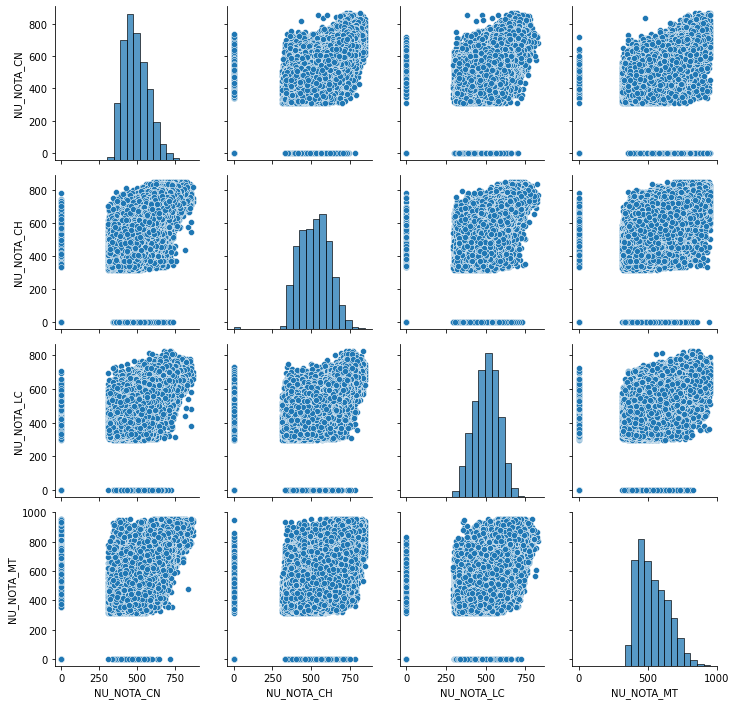

In [3]:
import seaborn as sns
g = sns.PairGrid(dfMicroDados[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT']])
g.map_diag(sns.histplot, bins=20)
g.map_offdiag(sns.scatterplot)
g.add_legend()

In [16]:
dfMicroDados[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT']].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT
count,2.245844e+06,2.378379e+06,2.378379e+06,2.245844e+06
mean,4.917857e+02,5.199434e+02,5.025556e+02,5.350802e+02
std,8.056676e+01,9.579050e+01,7.916405e+01,1.106267e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.310000e+02,4.454000e+02,4.476000e+02,4.447000e+02
50%,4.820000e+02,5.219000e+02,5.059000e+02,5.154000e+02
75%,5.458000e+02,5.893000e+02,5.588000e+02,6.139000e+02
max,8.671000e+02,8.469000e+02,8.261000e+02,9.531000e+02


In [6]:
dfMicroDados.TP_SEXO.value_counts()

F    2090526
M    1299306
Name: TP_SEXO, dtype: int64

In [8]:
dfMicroDados.Q002.value_counts()

E    1148575
B     471207
F     411426
D     399095
C     390463
G     380126
A      99094
H      89844
Name: Q002, dtype: int64

In [35]:
df1=dfMicroDados[['NU_NOTA_MT', 'TP_COR_RACA','TP_ESCOLA','TP_SEXO','Q002','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC']]

In [36]:
df1.head()

,NU_NOTA_MT,TP_COR_RACA,TP_ESCOLA,TP_SEXO,Q002,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC
0,NaN,1,1,F,F,NaN,574.6,472.6
1,461.5,1,1,M,B,505.9,551.8,498.3
2,NaN,1,1,F,C,NaN,NaN,NaN
3,659.5,3,2,M,B,580.7,678.9,638.9
4,582.6,3,2,F,E,497.7,532.4,457.6


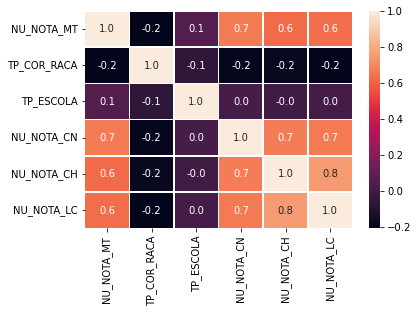

In [37]:
# análise de correlação
correlation = df1.corr()

# plot da matriz de correlação
plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

### Retirando da Análise os alunos que faltaram no dia da prova

Aproximadamente 30% dos alunos

In [38]:
df1.NU_NOTA_MT.isna().sum()/df1.shape[0]

0.33747631151042295

In [39]:
df2=df1[df1.NU_NOTA_MT.isna()==False]
df2.shape

(2245844, 8)

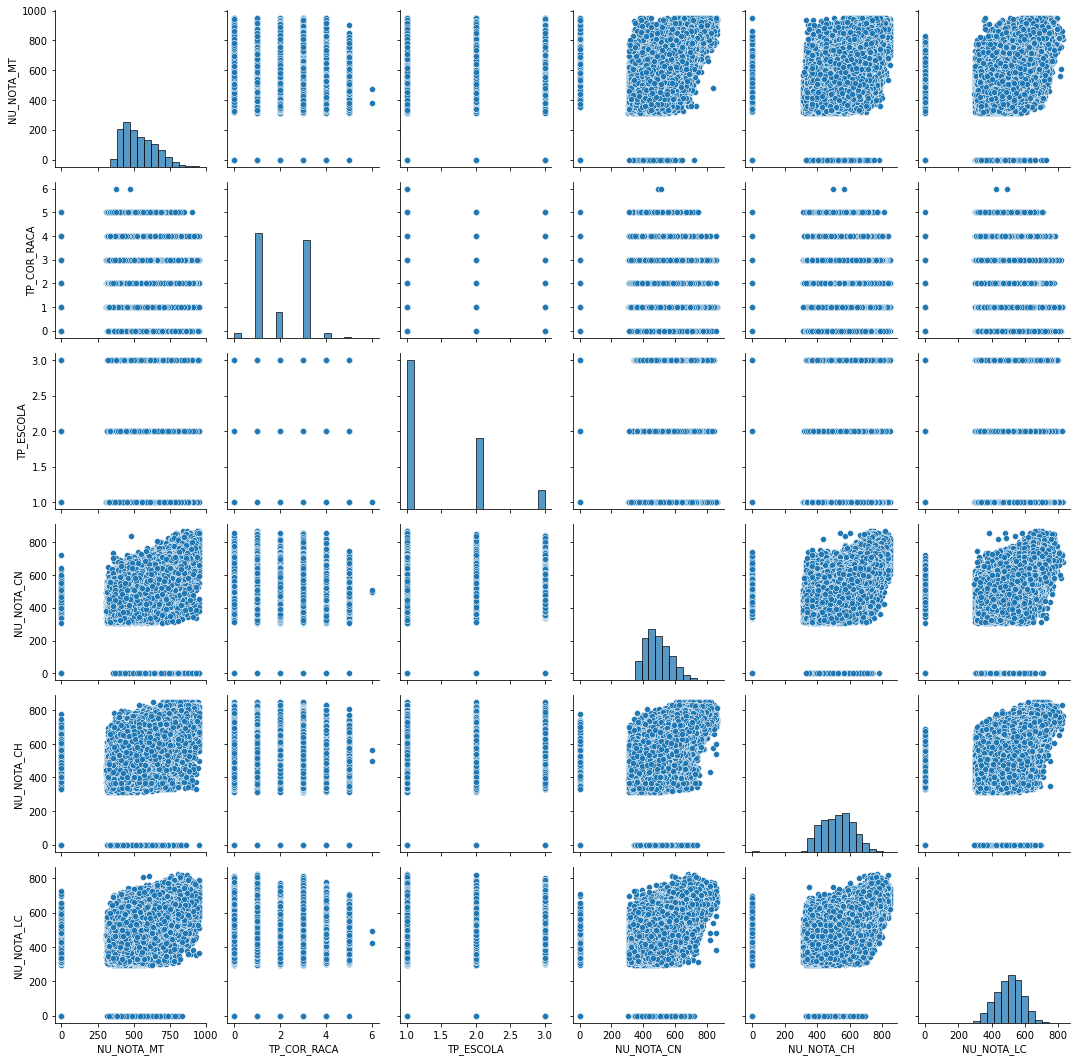

In [40]:
g = sns.PairGrid(df2)
g.map_diag(sns.histplot, bins=20)
g.map_offdiag(sns.scatterplot)
g.add_legend()

In [73]:
# Criando function
dict_alph2numeric = {
    'A':1,
    'B':2,
    'C':3,
    'D':4,
    'E':5,
    'F':6,
    'G':7,
    'H':0
  }

def alph2num(nota_alpha):
  return int(dict_alph2numeric[nota_alpha]) if dict_alph2numeric.get(nota_alpha) else 0

# converter nota alph to num
df2['NQ002'] = df2['Q002'].apply(lambda x: alph2num(x))

# displaying the data frame
df2.head()

<ipython-input-73-bde99be397a7>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['NQ002'] = df2['Q002'].apply(lambda x: alph2num(x))


,NU_NOTA_MT,TP_COR_RACA,TP_ESCOLA,TP_SEXO,Q002,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NQ002
1,461.5,1,1,M,B,505.9,551.8,498.3,2
3,659.5,3,2,M,B,580.7,678.9,638.9,2
4,582.6,3,2,F,E,497.7,532.4,457.6,5
8,493.4,3,2,F,B,487.4,476.5,450.7,2
9,413.3,3,2,F,D,507.6,539.2,494.6,4


# Análise Multinivel

In [75]:
df2.describe()

,NU_NOTA_MT,TP_COR_RACA,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NQ002
count,2.245844e+06,2.245844e+06,2.245844e+06,2.245844e+06,2.238107e+06,2.238107e+06,2.245844e+06
mean,5.350802e+02,1.985706e+00,1.458397e+00,4.917857e+02,5.231820e+02,5.048753e+02,4.585973e+00
std,1.106267e+02,1.022935e+00,6.388805e-01,8.056676e+01,9.438626e+01,7.809703e+01,1.706370e+00
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.447000e+02,1.000000e+00,1.000000e+00,4.310000e+02,4.489000e+02,4.501000e+02,3.000000e+00
50%,5.154000e+02,2.000000e+00,1.000000e+00,4.820000e+02,5.256000e+02,5.082000e+02,5.000000e+00
75%,6.139000e+02,3.000000e+00,2.000000e+00,5.458000e+02,5.919000e+02,5.608000e+02,6.000000e+00
max,9.531000e+02,6.000000e+00,3.000000e+00,8.671000e+02,8.469000e+02,8.261000e+02,7.000000e+00


In [71]:
df2.head()

,NU_NOTA_MT,TP_COR_RACA,TP_ESCOLA,TP_SEXO,Q002,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NQ002
1,461.5,1,1,M,B,505.9,551.8,498.3,2
3,659.5,3,2,M,B,580.7,678.9,638.9,2
4,582.6,3,2,F,E,497.7,532.4,457.6,5
8,493.4,3,2,F,B,487.4,476.5,450.7,2
9,413.3,3,2,F,D,507.6,539.2,494.6,4


In [32]:
import statsmodels.api as sm

import statsmodels.formula.api as smf

md = smf.mixedlm("NU_NOTA_MT ~ TP_COR_RACA", df2, groups=df2["TP_ESCOLA"])

mdf = md.fit()

print(mdf.summary())

/Users/angelicacustodio/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


            Mixed Linear Model Regression Results
Model:            MixedLM  Dependent Variable: NU_NOTA_MT    
No. Observations: 2245844  Method:             REML          
No. Groups:       3        Scale:              11206.0394    
Min. group size:  179554   Log-Likelihood:     -13657088.5980
Max. group size:  1395910  Converged:          Yes           
Mean group size:  748614.7                                   
-------------------------------------------------------------
              Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
-------------------------------------------------------------
Intercept     588.077   61.118    9.622 0.000 468.289 707.865
TP_COR_RACA   -19.437    0.070 -279.104 0.000 -19.574 -19.301
Group Var   11206.039                                        



In [33]:
import statsmodels.api as sm

import statsmodels.formula.api as smf

md = smf.mixedlm("NU_NOTA_MT ~ TP_SEXO", df2, groups=df2["TP_ESCOLA"])

mdf = md.fit()

print(mdf.summary())

/Users/angelicacustodio/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


            Mixed Linear Model Regression Results
Model:            MixedLM  Dependent Variable: NU_NOTA_MT    
No. Observations: 2245844  Method:             REML          
No. Groups:       3        Scale:              11249.5928    
Min. group size:  179554   Log-Likelihood:     -13661443.7435
Max. group size:  1395910  Converged:          Yes           
Mean group size:  748614.7                                   
-------------------------------------------------------------
               Coef.   Std.Err.    z    P>|z|  [0.025  0.975]
-------------------------------------------------------------
Intercept      536.203   61.236   8.756 0.000 416.183 656.224
TP_SEXO[T.M]    38.259    0.146 262.493 0.000  37.974  38.545
Group Var    11249.593                                       



In [46]:
import statsmodels.api as sm

import statsmodels.formula.api as smf

md = smf.mixedlm("NU_NOTA_MT ~ NU_NOTA_CN", df2, groups=df2["TP_ESCOLA"])

mdf = md.fit()


mdf.summary()

/Users/angelicacustodio/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


            Mixed Linear Model Regression Results
Model:            MixedLM  Dependent Variable: NU_NOTA_MT    
No. Observations: 2245844  Method:             REML          
No. Groups:       3        Scale:              6676.4353     
Min. group size:  179554   Log-Likelihood:     -13075567.3559
Max. group size:  1395910  Converged:          Yes           
Mean group size:  748614.7                                   
-------------------------------------------------------------
               Coef.   Std.Err.    z     P>|z| [0.025  0.975]
-------------------------------------------------------------
Intercept      103.074   47.176    2.185 0.029 10.610 195.538
NU_NOTA_CN       0.894    0.001 1286.248 0.000  0.893   0.896
Group Var     6676.435                                       



In [65]:
#import researchpy as rp
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.formula.api as smf
md = smf.mixedlm("NU_NOTA_MT ~ NU_NOTA_CN ",groups="TP_ESCOLA",data = df2).fit()

md.summary()

/Users/angelicacustodio/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
            Mixed Linear Model Regression Results
=============================================================
Model:            MixedLM  Dependent Variable: NU_NOTA_MT    
No. Observations: 2245844  Method:             REML          
No. Groups:       3        Scale:              6676.4353     
Min. group size:  179554   Log-Likelihood:     -13075567.3559
Max. group size:  1395910  Converged:          Yes           
Mean group size:  748614.7                                   
-------------------------------------------------------------
               Coef.   Std.Err.    z     P>|z| [0.025  0.975]
-------------------------------------------------------------
Intercept      103.074   47.176    2.185 0.029 10.610 195.538
NU_NOTA_CN       0.894    0.001 1286.248 0.000  0.893   0.896
TP_ESCOLA Var 6676.435                                       
=============================================================

"""

In [79]:
md = smf.mixedlm("NU_NOTA_MT ~ NQ002 + NU_NOTA_CN",groups="TP_ESCOLA",data = df2).fit()

md.summary()

/Users/angelicacustodio/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
            Mixed Linear Model Regression Results
=============================================================
Model:            MixedLM  Dependent Variable: NU_NOTA_MT    
No. Observations: 2245844  Method:             REML          
No. Groups:       3        Scale:              6473.4389     
Min. group size:  179554   Log-Likelihood:     -13040897.2111
Max. group size:  1395910  Converged:          Yes           
Mean group size:  748614.7                                   
-------------------------------------------------------------
               Coef.   Std.Err.    z     P>|z| [0.025  0.975]
-------------------------------------------------------------
Intercept       82.579   46.454    1.778 0.075 -8.469 173.626
NQ002            8.786    0.033  265.381 0.000  8.721   8.851
NU_NOTA_CN       0.850    0.001 1204.739 0.000  0.848   0.851
TP_ESCOLA Var 6473.439                                       
=============================================================

"""

**Variável TP_Escola:**

Tipo de escola do Ensino Médio

    1	Não Respondeu
    2	Pública
    3	Privada
    
**Variável Q002**

Até que série sua mãe, ou a mulher responsável por você, estudou?	

    A	Nunca estudou.
	B	Não completou a 4ª série/5º ano do Ensino Fundamental.
	C	Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.
	D	Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.
	E	Completou o Ensino Médio, mas não completou a Faculdade.
	F	Completou a Faculdade, mas não completou a Pós-graduação.
	G	Completou a Pós-graduação.
	H	Não sei.

In [48]:
df2.TP_ESCOLA.value_counts()

1    1395910
2     670380
3     179554
Name: TP_ESCOLA, dtype: int64

In [50]:
df2.Q002.value_counts()

E    797422
F    322164
G    310740
D    246368
B    244449
C    227128
H     49219
A     48353
Name: Q002, dtype: int64

In [59]:
df2[['Q002','NU_NOTA_MT']].groupby("Q002", group_keys=True).apply(lambda x: x.mean())

<ipython-input-59-49ef10ac8f9e>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2[['Q002','NU_NOTA_MT']].groupby("Q002", group_keys=True).apply(lambda x: x.mean())


,NU_NOTA_MT
Q002,
A,464.149095
B,484.902120
C,500.959871
D,510.254142
E,533.291417
F,582.523512
G,592.292280
H,492.932437


In [82]:
df2[['TP_ESCOLA','NU_NOTA_MT']].groupby("TP_ESCOLA", group_keys=True).apply(lambda x: x.std())

,TP_ESCOLA,NU_NOTA_MT
TP_ESCOLA,,
1,0.0,112.284611
2,0.0,95.298583
3,0.0,114.458431


In [48]:
df2.TP_ESCOLA.value_counts()

1    1395910
2     670380
3     179554
Name: TP_ESCOLA, dtype: int64

### Próximas análises

- Ajustar Modelo Multinivel considerando:
    - Q002 - como a Variável nível aluno 
    - TP_ESCOLA - como a Variável nível escola 
- Descobrir como ajustar isso no python
- interpretar coeficientes de saida e ver se faz sentido, se são significativos
- Escrever as retas de escola pública e privada
- Fazer visualização das variáveis Q002 e sexo por Nota de Matemática